## Homework 2 - Semih Akmese

In [16]:
#Importing Libs and Data
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y=True)

data = pd.DataFrame(X,columns = load_boston().feature_names)

In [17]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [19]:
data.info()
#All of the numerical columns define as float so there is no problem in the types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
#Let's we check the nan values 
data.isna().sum().sum()

0

### As we see, there is not nan value in the dataset
### Then we can check the correlation between the features

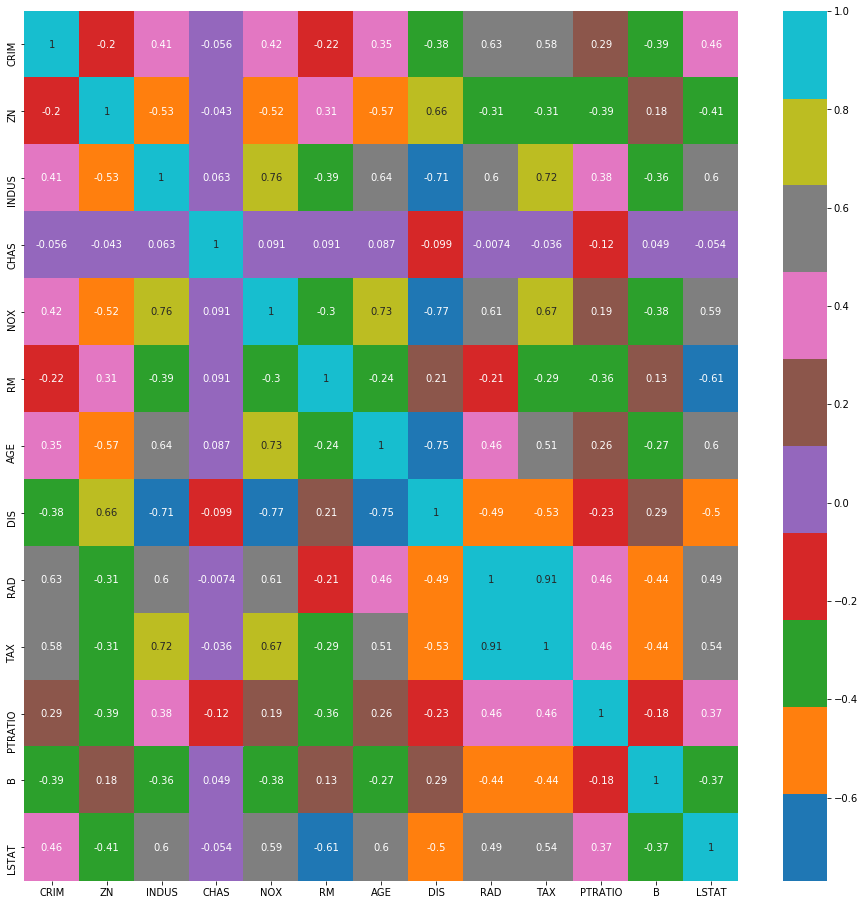

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16,16))
ax = sns.heatmap(
        data.corr(),
        cmap = sns.color_palette("tab10"),
        annot = True)


### Model Architecture and Preprocessing part


In [22]:
#We already checked the nan values in upper line and there is no nan values, so we don't need to fill them but we might also check correlated features
#and we need to drop one of them 
#First of all we might create(split) our model as %70 train, %30 test
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [23]:
#Creating the Linear Regression model
model = LinearRegression(normalize = False) # When we convert normalize parameter to "True" model does I2 normalization 
#But we need to outlier detection before any normalization or standartization process. 
model.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

#Checking Adjusted R2 score of the train and test datas 
print("Adj. R2 of the train set",adj_r2(X_train1,y_train1,model))
print("Adj. R2 of the test set",adj_r2(X_test1,y_test1,model))

Adj. R2 of the train set 0.6993145045524058
Adj. R2 of the test set 0.7632468138742887


In [11]:
importance = model.coef_
for i in range(len(importance)):
    print("Feature", data.columns[i], "Score:", importance[i])

Feature CRIM Score: -0.09854247168320532
Feature ZN Score: 0.06078411384243675
Feature INDUS Score: 0.059171540065624036
Feature CHAS Score: 2.4395598751551
Feature NOX Score: -21.469964963213545
Feature RM Score: 2.795813854535852
Feature AGE Score: 0.0035745977759390384
Feature DIS Score: -1.5162721842398477
Feature RAD Score: 0.3075417454645216
Feature TAX Score: -0.01128001663539708
Feature PTRATIO Score: -1.0054664025594264
Feature B Score: 0.006450184460880967
Feature LSTAT Score: -0.5688345385334818


In [25]:
#Dropping Colerated Labels - they'll mislead the model accuracy
df_new = data.drop(["AGE","INDUS"],axis = 1)

In [26]:
#Outlier Detection by using IsolationForest
from sklearn.ensemble import IsolationForest 
iso = IsolationForest(contamination=0.1)
isopred = iso.fit_predict(X_train1)

In [27]:
mask = isopred != -1
X_train1,y_train1 = X_train1[mask, :], y_train1[mask]
#By these codes we dropped our outlier values from the dataset


In [28]:
#Now we could do normalization process to our dataset
X_train, X_test, y_train, y_test = train_test_split(df_new,y,test_size = 0.3, random_state = 1)

In [30]:
#Let's try our model performance again 
modelnew = LinearRegression(normalize = True)
modelnew.fit(X_train,y_train)
print("Score of the train set",modelnew.score(X_train,y_train))
print("Score of the test set",modelnew.score(X_test,y_test))

Score of the train set 0.709844526155244
Score of the test set 0.7854584464532351


In [31]:
#Now we can do standardization process
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_train)
X_scaled

array([[-0.36571739, -0.48366069, -0.30429031, ...,  1.18880212,
         0.43987709, -0.64691635],
       [-0.4195265 ,  0.58018848, -0.30429031, ...,  0.58247746,
         0.231398  ,  0.20337764],
       [ 0.71430973, -0.48366069, -0.30429031, ...,  0.81567925,
         0.43987709,  1.13897622],
       ...,
       [ 0.25011703, -0.48366069, -0.30429031, ...,  0.81567925,
         0.43987709,  0.88168661],
       [-0.40087863, -0.48366069, -0.30429031, ..., -0.49025077,
         0.21666488, -0.28643573],
       [-0.43028363, -0.48366069, -0.30429031, ...,  0.34927567,
         0.43987709, -0.57674646]])

In [32]:
#Without outliers also scaled model performance is 
print("Score of the train set",modelnew.score(X_train,y_train))
print("Score of the test set",modelnew.score(X_test,y_test))

Score of the train set 0.709844526155244
Score of the test set 0.7854584464532351
